# Introduction

# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

C:\Users\eamon\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
from sklearn.metrics import accuracy_score

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.models import load_model
from keras import regularizers

C:\Users\eamon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Reviewing the Dataset

![Fashion MNIST Labels](images/fashion-mnist-sprite.png)

In [6]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

![Fashion MNIST Labels](images/fashion-mnist-labels.png)

In [5]:
pd.DataFrame(y_train).head()

,0
0,9
1,0
2,0
3,3
4,0


The dataset consists of 60000 train and 10000 test images.  These are 28x28 grayscale images of fashion items, labeled into 10 categories, as shown above. 

# Random Forest, GradientBoosting and SVC: Reproducing Results

Below is a list of benchmarks by established sklearn classifiers for the Fashion MNIST dataset.  They are listed in order of highest mean accuracy.

![Benchmarks](images/top-benchmarks.png)

The training data are given in a 60000x28x28 array, these classifiers can only process data in an array of dimension <= 2, so we need to reshape the 28x28 arrays into single row arrays of length 784. 

In [16]:
x_train = x_train.reshape(x_train.shape[0],784,)
x_test = x_test.reshape(x_test.shape[0],784,)

In [17]:
rf = RandomForestClassifier(n_estimators=100,max_depth=50,criterion='entropy')
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
print(accuracy_score(y_train, rf.predict(x_train)))
print(accuracy_score(y_test, rf.predict(x_test)))

1.0
0.8784


Clearly there is some overfitting, as is typical with any decision-tree based model, but we can see that we are approximately in line with the mean accuracy for test data in the benchmark list.

Now let's try the support vector classifier (SVC).  The train times being reported for the GradientBoostingClassifier have dissuaded me from trying to pursue that.  There's also a use of MLPClassifier, or Multilayer Perceptron Classifier, near the top, but this is essentially the equivalent of a basic sequential neural network structure with limited layer customization.  We will leave this for Keras to handle.

In [25]:
svc = SVC(C=10,kernel='poly',random_state=42)
svc.fit(x_train, y_train)

[LibSVM]

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1)

In [26]:
print(accuracy_score(y_train, svc.predict(x_train)))
print(accuracy_score(y_test, svc.predict(x_test)))

1.0
0.8723


This appears a bit lower than the mean listed in benchmark (0.897), however this may be down to the random state.

These results in the 0.85 to 0.90 range for accuracy score with RandomForest and SVC serve as a baseline.  We will try to improve on these scores with some different neural network architectures.

# Keras Sequential Neural Networks

In [6]:
np.random.seed(42)

In [8]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255.
x_test = x_test/255.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
x_train = x_train.reshape(x_train.shape[0],784,)
x_test = x_test.reshape(x_test.shape[0],784,)

model = Sequential()
model.add(Dense(x_train.shape[1], input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [116]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 15s 250us/step - loss: 0.4939 - acc: 0.8268 - val_loss: 0.4317 - val_acc: 0.8476
Epoch 2/15
60000/60000 [==============================] - 15s 245us/step - loss: 0.3625 - acc: 0.8703 - val_loss: 0.3742 - val_acc: 0.8664
Epoch 3/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.3245 - acc: 0.8822 - val_loss: 0.3629 - val_acc: 0.8700
Epoch 4/15
60000/60000 [==============================] - 14s 241us/step - loss: 0.3008 - acc: 0.8883 - val_loss: 0.3455 - val_acc: 0.8748
Epoch 5/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.2807 - acc: 0.8966 - val_loss: 0.3387 - val_acc: 0.8808
Epoch 6/15
60000/60000 [==============================] - 14s 233us/step - loss: 0.2684 - acc: 0.9013 - val_loss: 0.3633 - val_acc: 0.8694
Epoch 7/15
60000/60000 [==============================] - 14s 232us/step - loss: 0.2537 - acc: 0.9055 - val_loss: 0.

This very basic Sequential NN shows test accuracy in the area of 0.891, competitive with the best sklearn benchmarks.

Let's try inserting an additional hidden layer, and also applying dropout.

In [134]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255.
x_test = x_test/255.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
x_train = x_train.reshape(x_train.shape[0],784,)
x_test = x_test.reshape(x_test.shape[0],784,)

model3 = Sequential()
model3.add(Dense(x_train.shape[1], input_shape=(784,), activation='relu'))
model3.add(Dropout(.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(.5))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 17s 286us/step - loss: 0.8619 - acc: 0.6889 - val_loss: 0.5098 - val_acc: 0.8222
Epoch 2/15
60000/60000 [==============================] - 17s 281us/step - loss: 0.6070 - acc: 0.7845 - val_loss: 0.4531 - val_acc: 0.8347
Epoch 3/15
60000/60000 [==============================] - 17s 288us/step - loss: 0.5432 - acc: 0.8087 - val_loss: 0.4214 - val_acc: 0.8473
Epoch 4/15
60000/60000 [==============================] - 17s 283us/step - loss: 0.5106 - acc: 0.8208 - val_loss: 0.4255 - val_acc: 0.8476
Epoch 5/15
60000/60000 [==============================] - 17s 282us/step - loss: 0.4861 - acc: 0.8309 - val_loss: 0.3859 - val_acc: 0.8619
Epoch 6/15
60000/60000 [==============================] - 16s 269us/step - loss: 0.4664 - acc: 0.8363 - val_loss: 0.3895 - val_acc: 0.8606
Epoch 7/15
60000/60000 [==============================] - 16s 267us/step - loss: 0.4544 - acc: 0.8421 - val_loss: 0.

In [135]:
model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 265us/step - loss: 0.3814 - acc: 0.8634 - val_loss: 0.3603 - val_acc: 0.8721
Epoch 2/5
60000/60000 [==============================] - 17s 277us/step - loss: 0.3799 - acc: 0.8652 - val_loss: 0.3373 - val_acc: 0.8815
Epoch 3/5
60000/60000 [==============================] - 17s 278us/step - loss: 0.3762 - acc: 0.8668 - val_loss: 0.3478 - val_acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.3751 - acc: 0.8686 - val_loss: 0.3523 - val_acc: 0.8741
Epoch 5/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.3690 - acc: 0.8681 - val_loss: 0.3388 - val_acc: 0.8846


In [136]:
model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 262us/step - loss: 0.3652 - acc: 0.8702 - val_loss: 0.3462 - val_acc: 0.8819
Epoch 2/5
60000/60000 [==============================] - 17s 285us/step - loss: 0.3637 - acc: 0.8714 - val_loss: 0.3415 - val_acc: 0.8837
Epoch 3/5
60000/60000 [==============================] - 17s 281us/step - loss: 0.3613 - acc: 0.8731 - val_loss: 0.3382 - val_acc: 0.8817: 0.3608 - acc: 
Epoch 4/5
60000/60000 [==============================] - 17s 292us/step - loss: 0.3552 - acc: 0.8730 - val_loss: 0.3396 - val_acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 17s 276us/step - loss: 0.3544 - acc: 0.8751 - val_loss: 0.3339 - val_acc: 0.8822


### Sequential with (28,28,1) input array instead of (784,)

In [129]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [131]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(28, 28, 1), activation='linear'))
model2.add(Flatten())
model2.add(Dense(128, input_shape=(28, 28, 1), activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [132]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=256, epochs=15, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.6775 - acc: 0.7683 - val_loss: 0.4925 - val_acc: 0.8229
Epoch 2/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.4422 - acc: 0.8448 - val_loss: 0.4615 - val_acc: 0.8344
Epoch 3/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.4013 - acc: 0.8573 - val_loss: 0.4133 - val_acc: 0.8563
Epoch 4/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.3742 - acc: 0.8667 - val_loss: 0.4173 - val_acc: 0.8540
Epoch 5/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.3564 - acc: 0.8736 - val_loss: 0.3952 - val_acc: 0.8602
Epoch 6/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.3385 - acc: 0.8802 - val_loss: 0.3798 - val_acc: 0.8666
Epoch 7/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.3280 - acc: 0.8819 - val_loss: 0.3676 - val_acc

In [133]:
model2.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=256, epochs=15, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 29us/step - loss: 0.2420 - acc: 0.9112 - val_loss: 0.3330 - val_acc: 0.8826
Epoch 2/15
60000/60000 [==============================] - 3s 42us/step - loss: 0.2328 - acc: 0.9137 - val_loss: 0.3646 - val_acc: 0.8724
Epoch 3/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.2256 - acc: 0.9165 - val_loss: 0.3326 - val_acc: 0.8852
Epoch 4/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.2181 - acc: 0.9188 - val_loss: 0.3330 - val_acc: 0.8860
Epoch 5/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.2141 - acc: 0.9207 - val_loss: 0.3420 - val_acc: 0.8830
Epoch 6/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.2069 - acc: 0.9240 - val_loss: 0.3713 - val_acc: 0.8777
Epoch 7/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.2007 - acc: 0.9258 - val_loss: 0.3811 - val_acc

# Keras Convolutional Neural Network

It is well established that convolutional neural networks perform well in image classification.  Let's try a basic CNN.

In [9]:
np.random.seed(42)

In [7]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [11]:
cnn = Sequential()

cnn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())

cnn.add(Dense(20, activation='relu'))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [12]:
cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 304us/step - loss: 0.8195 - acc: 0.6948 - val_loss: 0.5513 - val_acc: 0.7954
Epoch 2/30
60000/60000 [==============================] - 15s 248us/step - loss: 0.4673 - acc: 0.8281 - val_loss: 0.4363 - val_acc: 0.8412
Epoch 3/30
60000/60000 [==============================] - 17s 285us/step - loss: 0.4025 - acc: 0.8539 - val_loss: 0.4069 - val_acc: 0.8532
Epoch 4/30
60000/60000 [==============================] - 19s 309us/step - loss: 0.3652 - acc: 0.8678 - val_loss: 0.3698 - val_acc: 0.8667
Epoch 5/30
60000/60000 [==============================] - 15s 244us/step - loss: 0.3397 - acc: 0.8766 - val_loss: 0.3632 - val_acc: 0.8730
Epoch 6/30
60000/60000 [==============================] - 16s 264us/step - loss: 0.3210 - acc: 0.8838 - val_loss: 0.3403 - val_acc: 0.8763
Epoch 7/30
60000/60000 [==============================] - 17s 282us/step - loss: 0.3010 - acc: 0.8913 - val_loss: 0.

In [8]:
def accuracy_loss_plots(model):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    ax1.plot(model.history.history['val_acc'])
    ax1.set_title('Test Accuracy by Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(0.8,1)
    ax2.plot(model.history.history['loss'], label='Training loss')
    ax2.plot(model.history.history['val_loss'], label='Testing loss')
    ax2.set_title('Loss Reduction by Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(0,1)
    ax2.legend();

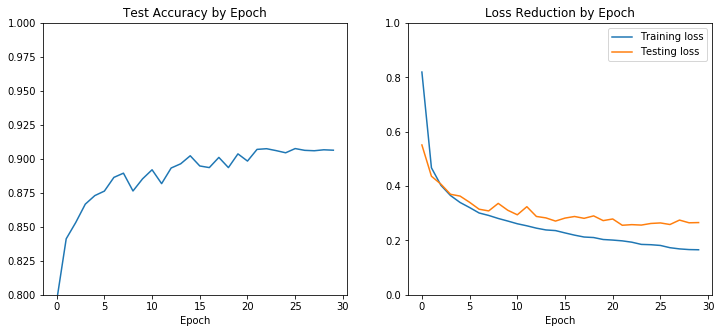

In [59]:
accuracy_loss_plots(cnn)

This CNN tops out around test accuracy of 0.90.  Let's try a configuration with some dropout layers.

In [37]:
cnn2 = Sequential()

cnn2.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(28,28,1))) 
cnn2.add(MaxPooling2D(pool_size=(2,2))) 
cnn2.add(Conv2D(32,kernel_size = 3,activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Flatten())
cnn2.add(Dense(64, activation='relu'))
cnn2.add(Dropout(0.5))
cnn2.add(Dense(16, activation='relu'))
cnn2.add(Dropout(0.5))
cnn2.add(Dense(10, activation='softmax'))

cnn2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

cnn2.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=30,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 197us/step - loss: 1.3632 - acc: 0.4824 - val_loss: 0.6366 - val_acc: 0.7500
Epoch 2/30
60000/60000 [==============================] - 11s 183us/step - loss: 0.9607 - acc: 0.6220 - val_loss: 0.5605 - val_acc: 0.7901
Epoch 3/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.8625 - acc: 0.6636 - val_loss: 0.5296 - val_acc: 0.7957
Epoch 4/30
60000/60000 [==============================] - 11s 187us/step - loss: 0.8170 - acc: 0.6890 - val_loss: 0.5128 - val_acc: 0.8080
Epoch 5/30
60000/60000 [==============================] - 14s 241us/step - loss: 0.7716 - acc: 0.7077 - val_loss: 0.4925 - val_acc: 0.8148
Epoch 6/30
60000/60000 [==============================] - 9s 146us/step - loss: 0.7534 - acc: 0.7145 - val_loss: 0.4737 - val_acc: 0.8253
Epoch 7/30
60000/60000 [==============================] - 10s 165us/step - loss: 0.7278 - acc: 0.7252 - val_loss: 0.4

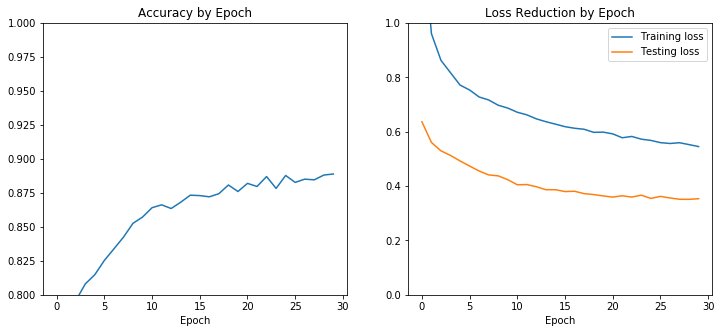

In [52]:
accuracy_loss_plots(cnn2)

Given that the test loss is still lower than the train loss, so that the model is not overfitted at all, it's worth seeing how this holds up or perhaps improves over another set of epochs.

In [55]:
#Saving these for graphing purposes
train_loss = cnn2.history.history['loss']
test_loss = cnn2.history.history['val_loss']
accuracy = cnn2.history.history['val_acc']

In [56]:
cnn2.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=30,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 149us/step - loss: 0.5463 - acc: 0.8038 - val_loss: 0.3589 - val_acc: 0.8873
Epoch 2/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.5472 - acc: 0.8029 - val_loss: 0.3512 - val_acc: 0.8872
Epoch 3/30
60000/60000 [==============================] - 10s 169us/step - loss: 0.5339 - acc: 0.8067 - val_loss: 0.3536 - val_acc: 0.8875
Epoch 4/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.5381 - acc: 0.8062 - val_loss: 0.3614 - val_acc: 0.8853
Epoch 5/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.5389 - acc: 0.8046 - val_loss: 0.3452 - val_acc: 0.8936
Epoch 6/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.5332 - acc: 0.8094 - val_loss: 0.3595 - val_acc: 0.8899
Epoch 7/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.5322 - acc: 0.8099 - val_loss: 0.3547 -

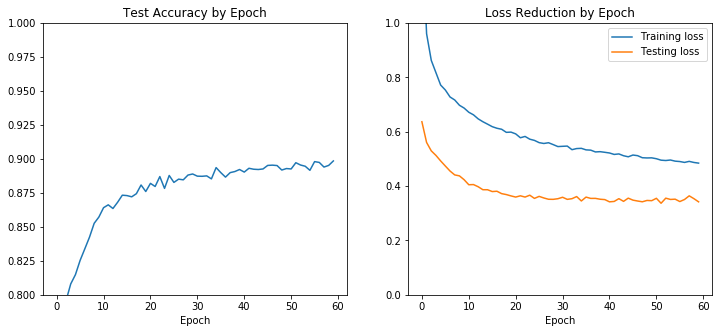

In [58]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.plot(np.append(accuracy, cnn2.history.history['val_acc']))
ax1.set_title('Test Accuracy by Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylim(0.8,1)
ax2.plot(np.append(train_loss, cnn2.history.history['loss']), label='Training loss')
ax2.plot(np.append(test_loss, cnn2.history.history['val_loss']), label='Testing loss')
ax2.set_title('Loss Reduction by Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylim(0,1)
ax2.legend();

### Manual Tuning

In [ ]:
I felt the convolutional and pooling layers from the first CNN may have better suited the data based on the results, so I replaced these in the second model and checked the resulting combination (CNN3)

In [61]:
cnn3 = Sequential()

cnn3.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Flatten())
cnn3.add(Dense(64, activation='relu'))
cnn3.add(Dropout(0.5))
cnn3.add(Dense(16, activation='relu'))
cnn3.add(Dropout(0.5))
cnn3.add(Dense(10, activation='softmax'))

cnn3.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

cnn3.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=30,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 357us/step - loss: 1.3826 - acc: 0.4931 - val_loss: 0.6410 - val_acc: 0.7765
Epoch 2/30
60000/60000 [==============================] - 21s 350us/step - loss: 0.9238 - acc: 0.6584 - val_loss: 0.5506 - val_acc: 0.8057
Epoch 3/30
60000/60000 [==============================] - 20s 333us/step - loss: 0.8090 - acc: 0.6971 - val_loss: 0.4979 - val_acc: 0.8194
Epoch 4/30
60000/60000 [==============================] - 21s 353us/step - loss: 0.7673 - acc: 0.7120 - val_loss: 0.4884 - val_acc: 0.8197
Epoch 5/30
60000/60000 [==============================] - 24s 392us/step - loss: 0.7354 - acc: 0.7203 - val_loss: 0.4615 - val_acc: 0.8301
Epoch 6/30
60000/60000 [==============================] - 18s 302us/step - loss: 0.7082 - acc: 0.7320 - val_loss: 0.4625 - val_acc: 0.8337
Epoch 7/30
60000/60000 [==============================] - 23s 385us/step - loss: 0.6880 - acc: 0.7420 - val_loss: 0.

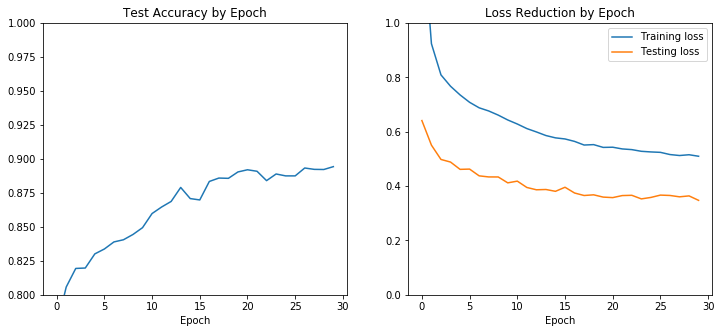

In [62]:
accuracy_loss_plots(cnn3)

In [63]:
train_loss = cnn3.history.history['loss']
test_loss = cnn3.history.history['val_loss']
accuracy = cnn3.history.history['val_acc']

In [64]:
cnn3.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=30,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 19s 318us/step - loss: 0.5061 - acc: 0.8329 - val_loss: 0.3550 - val_acc: 0.8906
Epoch 2/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.5081 - acc: 0.8331 - val_loss: 0.3615 - val_acc: 0.8922
Epoch 3/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.5016 - acc: 0.8375 - val_loss: 0.3628 - val_acc: 0.8914
Epoch 4/30
60000/60000 [==============================] - 20s 329us/step - loss: 0.4963 - acc: 0.8371 - val_loss: 0.3526 - val_acc: 0.8918
Epoch 5/30
60000/60000 [==============================] - 23s 383us/step - loss: 0.4983 - acc: 0.8355 - val_loss: 0.3678 - val_acc: 0.8905
Epoch 6/30
60000/60000 [==============================] - 22s 360us/step - loss: 0.4915 - acc: 0.8371 - val_loss: 0.3538 - val_acc: 0.8953
Epoch 7/30
60000/60000 [==============================] - 19s 319us/step - loss: 0.4983 - acc: 0.8368 - val_loss: 0.

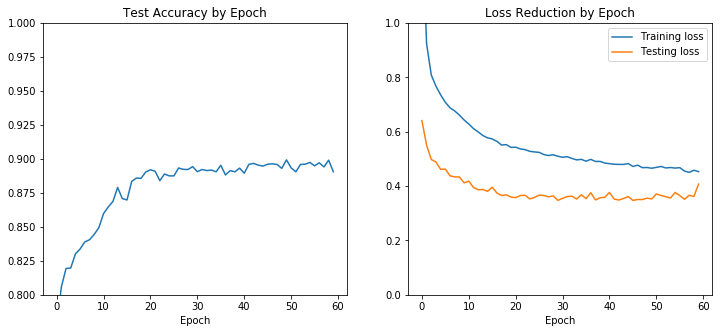

In [65]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.plot(np.append(accuracy, cnn3.history.history['val_acc']))
ax1.set_title('Test Accuracy by Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylim(0.8,1)
ax2.plot(np.append(train_loss, cnn3.history.history['loss']), label='Training loss')
ax2.plot(np.append(test_loss, cnn3.history.history['val_loss']), label='Testing loss')
ax2.set_title('Loss Reduction by Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylim(0,1)
ax2.legend();

For the next attempt, I tried removing a pooling layer, to leave only a pooling layer at the end of the convolution stage.  I also reduced the dropout rates to 0.3.

In [67]:
cnn4 = Sequential()

cnn4.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn4.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2,2)))
cnn4.add(Flatten())
cnn4.add(Dense(32, activation='relu'))
cnn4.add(Dropout(0.3))
cnn4.add(Dense(128, activation='relu'))
cnn4.add(Dropout(0.3))
cnn4.add(Dense(10, activation='softmax'))

cnn4.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

cnn4.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=40,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 20s 328us/step - loss: 0.7824 - acc: 0.7093 - val_loss: 0.4398 - val_acc: 0.8421
Epoch 2/40
60000/60000 [==============================] - 24s 407us/step - loss: 0.4996 - acc: 0.8177 - val_loss: 0.3840 - val_acc: 0.8640
Epoch 3/40
60000/60000 [==============================] - 26s 440us/step - loss: 0.4281 - acc: 0.8441 - val_loss: 0.3321 - val_acc: 0.8858
Epoch 4/40
60000/60000 [==============================] - 24s 403us/step - loss: 0.3846 - acc: 0.8621 - val_loss: 0.3246 - val_acc: 0.8883
Epoch 5/40
60000/60000 [==============================] - 26s 426us/step - loss: 0.3577 - acc: 0.8710 - val_loss: 0.2956 - val_acc: 0.9018
Epoch 6/40
60000/60000 [==============================] - 25s 416us/step - loss: 0.3316 - acc: 0.8796 - val_loss: 0.2902 - val_acc: 0.9037
Epoch 7/40
60000/60000 [==============================] - 18s 292us/step - loss: 0.3148 - acc: 0.8858 - val_loss: 0.

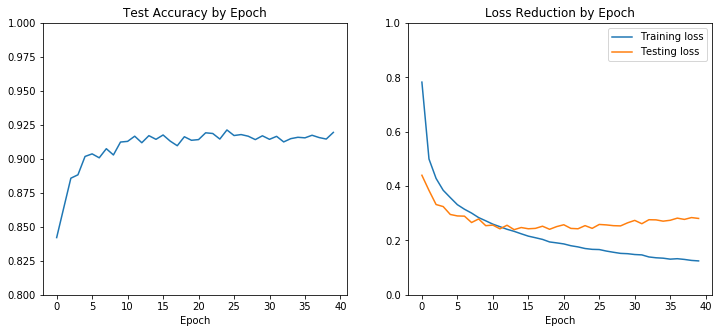

In [68]:
accuracy_loss_plots(cnn4)

Although I trained this model for too long, it clearly performed well, reaching consistent test accuracy around 91.5%.  My next step was to tune this model a bit closer, and also introduce an early stopping feature in the event this should happen again. 

In [79]:
cnn4 = Sequential()

#Increased the depth of the convolutional layers
cnn4.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn4.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2,2)))
cnn4.add(Flatten())
cnn4.add(Dense(32, activation='relu'))
cnn4.add(Dropout(0.3))
#Added a dense layer with no dropout here, to create a layer of neurons that will retain their learning.
cnn4.add(Dense(64, activation='relu'))
cnn4.add(Dense(128, activation='relu'))
cnn4.add(Dropout(0.3))
cnn4.add(Dense(10, activation='softmax'))

cnn4.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

#Introduced Early Stop
callbacks_list = [EarlyStopping(monitor='val_loss', restore_best_weights=True)]

cnn4.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=25,verbose=1,callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 39s 655us/step - loss: 0.7029 - acc: 0.7435 - val_loss: 0.3963 - val_acc: 0.8544
Epoch 2/25
60000/60000 [==============================] - 36s 604us/step - loss: 0.4254 - acc: 0.8493 - val_loss: 0.3216 - val_acc: 0.8851
Epoch 3/25
60000/60000 [==============================] - 37s 615us/step - loss: 0.3641 - acc: 0.8693 - val_loss: 0.3001 - val_acc: 0.8904
Epoch 4/25
60000/60000 [==============================] - 36s 597us/step - loss: 0.3269 - acc: 0.8822 - val_loss: 0.2876 - val_acc: 0.8939
Epoch 5/25
60000/60000 [==============================] - 37s 611us/step - loss: 0.2998 - acc: 0.8907 - val_loss: 0.2750 - val_acc: 0.8998
Epoch 6/25
60000/60000 [==============================] - 37s 613us/step - loss: 0.2769 - acc: 0.8994 - val_loss: 0.2718 - val_acc: 0.9023
Epoch 7/25
60000/60000 [==============================] - 36s 595us/step - loss: 0.2584 - acc: 0.9057 - val_loss: 0.

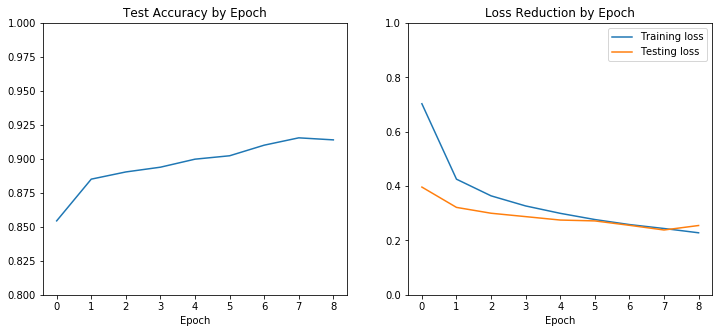

In [80]:
accuracy_loss_plots(cnn4)

In [90]:
cnn6 = Sequential()

cnn6.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn6.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn6.add(MaxPooling2D(pool_size=(2,2)))
cnn6.add(Flatten())
cnn6.add(Dense(32, activation='relu'))
cnn6.add(Dropout(0.3))
cnn6.add(Dense(64, activation='relu'))
cnn6.add(Dense(128, activation='relu'))
cnn6.add(Dropout(0.3))
cnn6.add(Dense(10, activation='softmax'))

cnn6.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

#Removed Early Stopping

#Reduced batch size to 64
cnn6.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10,verbose=1)  #callbacks=callbacks_list

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 777us/step - loss: 0.7057 - acc: 0.7379 - val_loss: 0.4032 - val_acc: 0.8568
Epoch 2/10
60000/60000 [==============================] - 51s 849us/step - loss: 0.4531 - acc: 0.8367 - val_loss: 0.3251 - val_acc: 0.8928
Epoch 3/10
60000/60000 [==============================] - 47s 783us/step - loss: 0.3854 - acc: 0.8626 - val_loss: 0.2963 - val_acc: 0.8996
Epoch 4/10
60000/60000 [==============================] - 46s 767us/step - loss: 0.3494 - acc: 0.8765 - val_loss: 0.2936 - val_acc: 0.9006
Epoch 5/10
60000/60000 [==============================] - 48s 800us/step - loss: 0.3181 - acc: 0.8892 - val_loss: 0.2760 - val_acc: 0.9053
Epoch 6/10
60000/60000 [==============================] - 49s 824us/step - loss: 0.2945 - acc: 0.8970 - val_loss: 0.2717 - val_acc: 0.9068
Epoch 7/10
60000/60000 [==============================] - 46s 764us/step - loss: 0.2732 - acc: 0.9033 - val_loss: 0.

Next I tried adding Dropout to the convolutional layers, which I had seen mention of as a possibility, albeit with lower dropout levels (0.1-0.2).  Given the increased dropout, I expected longer epoch runs before train and test converged.  I didn't really observe this however.  What I did notice is that validation accuracy tended to increase even after the model was slightly overfit, which was something I hadn't been observing prior.  I ended up removing some of the dense layers as well, in order to increase efficiency, increase the chaotic influence of the dropout layers preventing overfitting, and test how performance compared.  Another thing worth noting is that with the unpredictability of the multiple dropout layers, I avoided EarlyStopping.  I saw validation accuracy close to 0.93 with consistency for the first time with these nets.

In [93]:
#Tried adding Dropout to the convolutional layers
cnn7 = Sequential()
cnn7.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn7.add(Dropout(0.2))
cnn7.add(Conv2D(64, (3, 3), activation='relu'))
cnn7.add(MaxPooling2D(pool_size=(2, 2)))
cnn7.add(Dropout(0.2))
cnn7.add(Flatten())
cnn7.add(Dense(128, activation='relu'))
cnn7.add(Dropout(0.3))
cnn7.add(Dense(10, activation='softmax'))

cnn7.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

cnn7.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=256,epochs=15,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.5749 - acc: 0.7939 - val_loss: 0.3962 - val_acc: 0.8545
Epoch 2/15
60000/60000 [==============================] - 57s 949us/step - loss: 0.3594 - acc: 0.8707 - val_loss: 0.3125 - val_acc: 0.8848
Epoch 3/15
60000/60000 [==============================] - 57s 948us/step - loss: 0.3052 - acc: 0.8901 - val_loss: 0.2905 - val_acc: 0.8945
Epoch 4/15
60000/60000 [==============================] - 58s 962us/step - loss: 0.2705 - acc: 0.9012 - val_loss: 0.2631 - val_acc: 0.9034
Epoch 5/15
60000/60000 [==============================] - 57s 956us/step - loss: 0.2460 - acc: 0.9105 - val_loss: 0.2611 - val_acc: 0.9040
Epoch 6/15
60000/60000 [==============================] - 58s 964us/step - loss: 0.2242 - acc: 0.9181 - val_loss: 0.2351 - val_acc: 0.9142
Epoch 7/15
60000/60000 [==============================] - 57s 949us/step - loss: 0.2072 - acc: 0.9248 - val_loss: 0.23

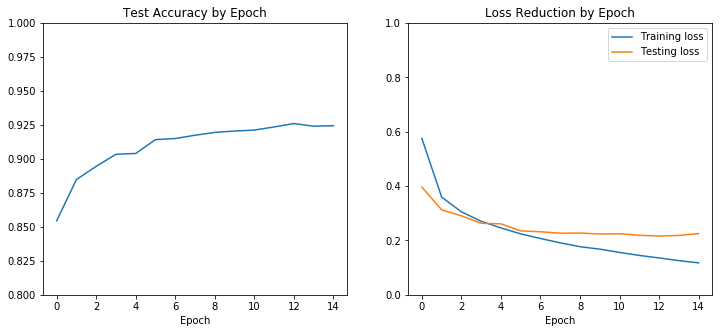

In [94]:
accuracy_loss_plots(cnn7)

### Winning Models from CNN Tuning - BatchNormalization, Padding, Multiple Conv2D layers with Dropout, Single Dense Hidden Layer

In [15]:
cnn8 = Sequential()
cnn8.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
#Inserted BatchNorm
cnn8.add(BatchNormalization())
cnn8.add(Dropout(0.2))
cnn8.add(Conv2D(64, (3, 3), activation='relu'))
cnn8.add(MaxPooling2D(pool_size=(2, 2)))
cnn8.add(Dropout(0.2))
cnn8.add(Flatten())
cnn8.add(Dense(128, activation='relu'))
cnn8.add(Dropout(0.3))
cnn8.add(Dense(10, activation='softmax'))

cnn8.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

cnn8.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=256,epochs=25,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 81s 1ms/step - loss: 0.6168 - acc: 0.7867 - val_loss: 0.3715 - val_acc: 0.8658
Epoch 2/25
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3711 - acc: 0.8669 - val_loss: 0.3129 - val_acc: 0.8818
Epoch 3/25
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3168 - acc: 0.8849 - val_loss: 0.2733 - val_acc: 0.9006
Epoch 4/25
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2799 - acc: 0.8975 - val_loss: 0.2609 - val_acc: 0.9030
Epoch 5/25
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2535 - acc: 0.9067 - val_loss: 0.2429 - val_acc: 0.9104
Epoch 6/25
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2355 - acc: 0.9130 - val_loss: 0.2406 - val_acc: 0.9155
Epoch 7/25
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2198 - acc: 0.9188 - val_loss: 0.2257 - val_acc

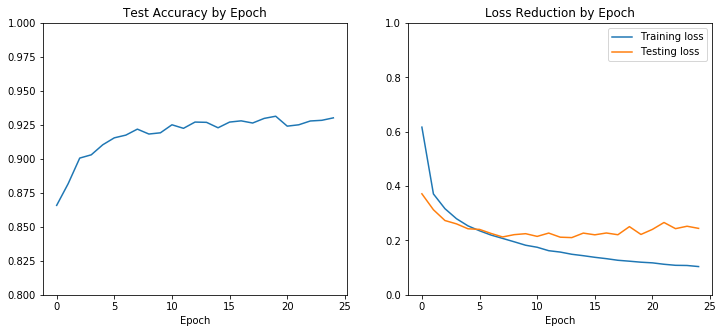

In [16]:
accuracy_loss_plots(cnn8)

In [ ]:
cnn8_loaded = load_model('check')

In [19]:
cnn8.save('cnn8.h5')

In [23]:
cnn8.evaluate(x_test,y_test)

10000/10000 [==============================] - 6s 566us/step


[0.2443813988763839, 0.9302]

In [44]:
#Added padding=same
cnn9 = Sequential()
cnn9.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
cnn9.add(BatchNormalization())
cnn9.add(Dropout(0.2))
cnn9.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
cnn9.add(Dropout(0.2))
cnn9.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
cnn9.add(Dropout(0.2))
cnn9.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
cnn9.add(MaxPooling2D(pool_size=(2,2)))
cnn9.add(Dropout(0.2))
cnn9.add(Flatten())
cnn9.add(Dense(128, activation='relu'))
cnn9.add(Dropout(0.3))
cnn9.add(Dense(10, activation='softmax'))

cnn9.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

#Inserted ModelCheckpoint
callback_list=[ModelCheckpoint(filepath='cnn9.h5', monitor='val_acc', save_best_only=True, mode='max')]

cnn9.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=20,verbose=1,callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 182s 3ms/step - loss: 0.7843 - acc: 0.7279 - val_loss: 0.3804 - val_acc: 0.8636
Epoch 2/20
60000/60000 [==============================] - 182s 3ms/step - loss: 0.4209 - acc: 0.8456 - val_loss: 0.3052 - val_acc: 0.8926
Epoch 3/20
60000/60000 [==============================] - 181s 3ms/step - loss: 0.3555 - acc: 0.8711 - val_loss: 0.2921 - val_acc: 0.8921
Epoch 4/20
60000/60000 [==============================] - 183s 3ms/step - loss: 0.3153 - acc: 0.8855 - val_loss: 0.2546 - val_acc: 0.9071
Epoch 5/20
60000/60000 [==============================] - 179s 3ms/step - loss: 0.2864 - acc: 0.8945 - val_loss: 0.2365 - val_acc: 0.9147
Epoch 6/20
60000/60000 [==============================] - 182s 3ms/step - loss: 0.2675 - acc: 0.9009 - val_loss: 0.2316 - val_acc: 0.9177
Epoch 7/20
60000/60000 [==============================] - 181s 3ms/step - loss: 0.2513 - acc: 0.9065 - val_loss: 0.2241 - 

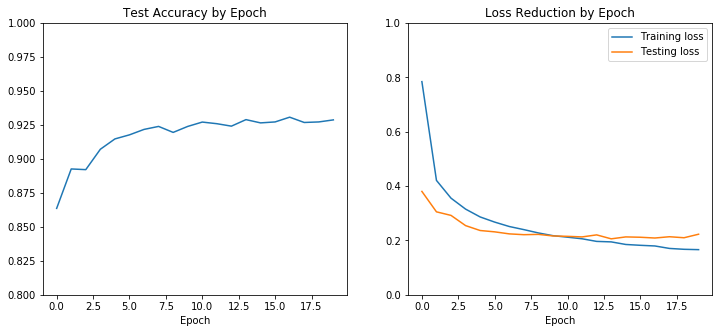

In [45]:
accuracy_loss_plots(cnn9)

In [9]:
cnn9_best = load_model('cnn9.h5')

In [10]:
cnn8_best = load_model('cnn8.h5')

In [47]:
cnn9_best.evaluate(x_test,y_test)

10000/10000 [==============================] - 23s 2ms/step


[0.20891831384301185, 0.9307]

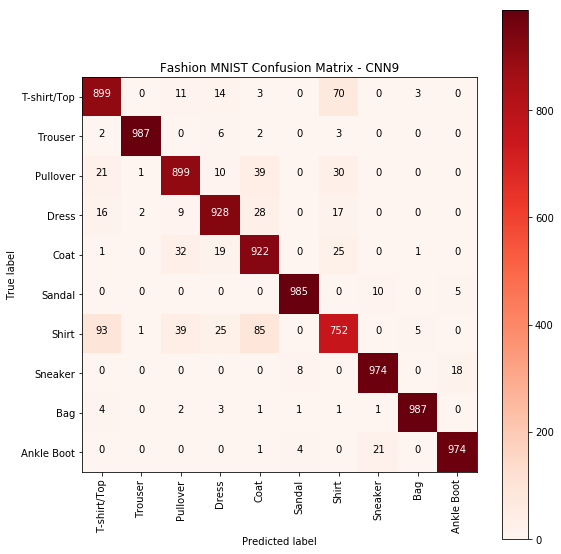

In [62]:
from sklearn.metrics import confusion_matrix
from itertools import product

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

#Create Multiclass Confusion Matrix

preds = cnn9_best.predict(x_test)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Reds)
plt.title('Fashion MNIST Confusion Matrix - CNN9')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');

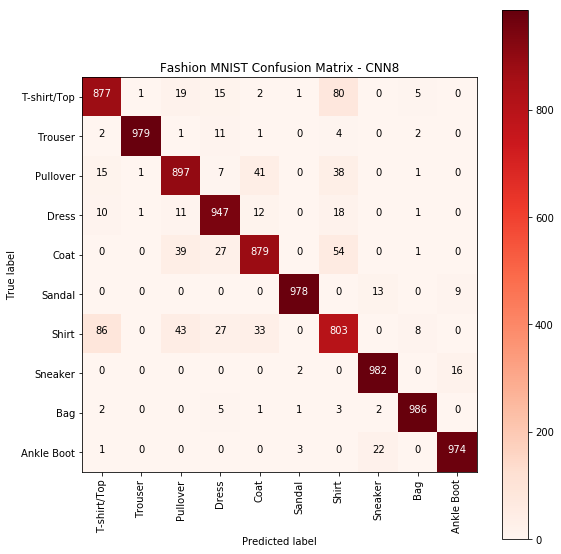

In [63]:
preds = cnn8.predict(x_test)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Reds)
plt.title('Fashion MNIST Confusion Matrix - CNN8')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
data augmentation, prelu, other Conv2D args

In [ ]:
convolutional filters: rotation

Neural net just for the shirts and combine

confusion matrix with all classes, shows which get confused...

In [14]:
from ddrop.layers import DropConnectDense, DropConnect

In [13]:
import tensorflow as tf

In [19]:
cnn10 = Sequential()
cnn10.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn10.add(BatchNormalization())
cnn10.add(Dropout(0.2))
cnn10.add(Conv2D(64, (3, 3), activation='relu'))
cnn10.add(MaxPooling2D(pool_size=(2, 2)))
cnn10.add(Dropout(0.2))
cnn10.add(Flatten())
cnn10.add(Dense(128, activation='relu'))
cnn10.add(DropConnect(Dense,128), 0.3)
cnn10.add(Dense(10, activation='softmax'))

cnn10.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

callback_list=[ModelCheckpoint(filepath='cnn9.h5', monitor='val_acc', save_best_only=True, mode='max')]

cnn10.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=256,epochs=25,verbose=1,callbacks=callback_list)

TypeError: add() takes 2 positional arguments but 3 were given

In [41]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

from ddrop.layers import DropConnectDense, DropConnect

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

inputs = Input(shape=(28,28,1))
x = Conv2D(32, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Conv2D(32, kernel_size=3, activation='relu',padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(24, kernel_size=3, activation='relu',padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(64, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
#x = Dense(128, activation='relu')(x)
#x = Dropout(0.3)(x)
#x = Dense(64, activation='relu')(x)
x = DropConnect(Dense(128, activation='relu'), prob=0.3)(x)
#x = Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

cnn11 = Model(input=inputs, output=predictions)
cnn11.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callback_list=[ModelCheckpoint(filepath='cnn11.h5', monitor='val_acc', save_best_only=True, mode='max')]

cnn11.fit(x_train, y_train, batch_size=128, nb_epoch=20,
          verbose=1, validation_data=(x_test, y_test),callbacks=callback_list)
#score = cnn11.evaluate(x_test, y_test, verbose=0)

C:\Users\eamon\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\eamon\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 107s 2ms/step - loss: 0.4473 - acc: 0.8428 - val_loss: 0.3443 - val_acc: 0.8804
Epoch 2/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.3021 - acc: 0.8921 - val_loss: 0.2970 - val_acc: 0.8924
Epoch 3/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2640 - acc: 0.9066 - val_loss: 0.2755 - val_acc: 0.9014
Epoch 4/20
60000/60000 [==============================] - 102s 2ms/step - loss: 0.2381 - acc: 0.9136 - val_loss: 0.2626 - val_acc: 0.9042
Epoch 5/20
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2195 - acc: 0.9198 - val_loss: 0.2621 - val_acc: 0.9038
Epoch 6/20
60000/60000 [==============================] - 99s 2ms/step - loss: 0.2003 - acc: 0.9263 - val_loss: 0.2500 - val_acc: 0.9085
Epoch 7/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.1847 - acc: 0.9318 - val_loss: 0.2441 - val

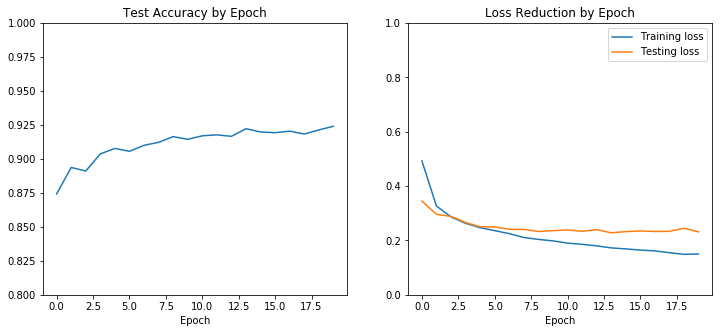

In [43]:
accuracy_loss_plots(cnn10)

In [35]:
inputs

<tf.Tensor 'input_13:0' shape=(?, 60000, 28, 28, 1) dtype=float32>

In [ ]:
cnn9 = Sequential()
cnn9.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
cnn9.add(BatchNormalization())
cnn9.add(Dropout(0.2))
cnn9.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
cnn9.add(Dropout(0.2))
cnn9.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
cnn9.add(Dropout(0.2))
cnn9.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
cnn9.add(MaxPooling2D(pool_size=(2,2)))
cnn9.add(Dropout(0.2))
cnn9.add(Flatten())
cnn9.add(Dense(128, activation='relu'))
cnn9.add(Dropout(0.3))
cnn9.add(Dense(10, activation='softmax'))

# AC-GAN?